<a href="https://www.kaggle.com/code/dsptlp/line-graph?scriptVersionId=204191210" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import math

In [2]:
def download_csv(url, destination):
    response = requests.get(url)
    with open(destination, 'wb') as file:
        file.write(response.content)

csv_url = 'https://www150.statcan.gc.ca/t1/tbl1/en/dtl!downloadDbLoadingData-nonTraduit.action?pid=2010005604&latestN=0&startDate=20170701&endDate=20241101&csvLocale=en&selectedMembers=%5B%5B1%5D%2C%5B2%2C3%2C4%2C5%2C6%2C7%5D%2C%5B%5D%2C%5B2%5D%5D&checkedLevels=2D1'
destination_path = 'data_file.csv'

download_csv(csv_url, destination_path)

In [3]:
df = pd.read_csv(destination_path, encoding='utf-8')
df.tail(5)

,REF_DATE,GEO,DGUID,North American Industry Classification System (NAICS),Sales,Adjustments,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
511,2024-04,Canada,2016A000011124,"Automotive parts, accessories and tire retaile...",Total retail sales,Seasonally adjusted,Dollars,81,thousands,3,v1446859496,1.7.1.2,1284559,A,NaN,NaN,0
512,2024-05,Canada,2016A000011124,"Automotive parts, accessories and tire retaile...",Total retail sales,Seasonally adjusted,Dollars,81,thousands,3,v1446859496,1.7.1.2,1241217,A,NaN,NaN,0
513,2024-06,Canada,2016A000011124,"Automotive parts, accessories and tire retaile...",Total retail sales,Seasonally adjusted,Dollars,81,thousands,3,v1446859496,1.7.1.2,1254766,A,NaN,NaN,0
514,2024-07,Canada,2016A000011124,"Automotive parts, accessories and tire retaile...",Total retail sales,Seasonally adjusted,Dollars,81,thousands,3,v1446859496,1.7.1.2,1274382,A,NaN,NaN,0
515,2024-08,Canada,2016A000011124,"Automotive parts, accessories and tire retaile...",Total retail sales,Seasonally adjusted,Dollars,81,thousands,3,v1446859496,1.7.1.2,1279061,A,NaN,NaN,0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


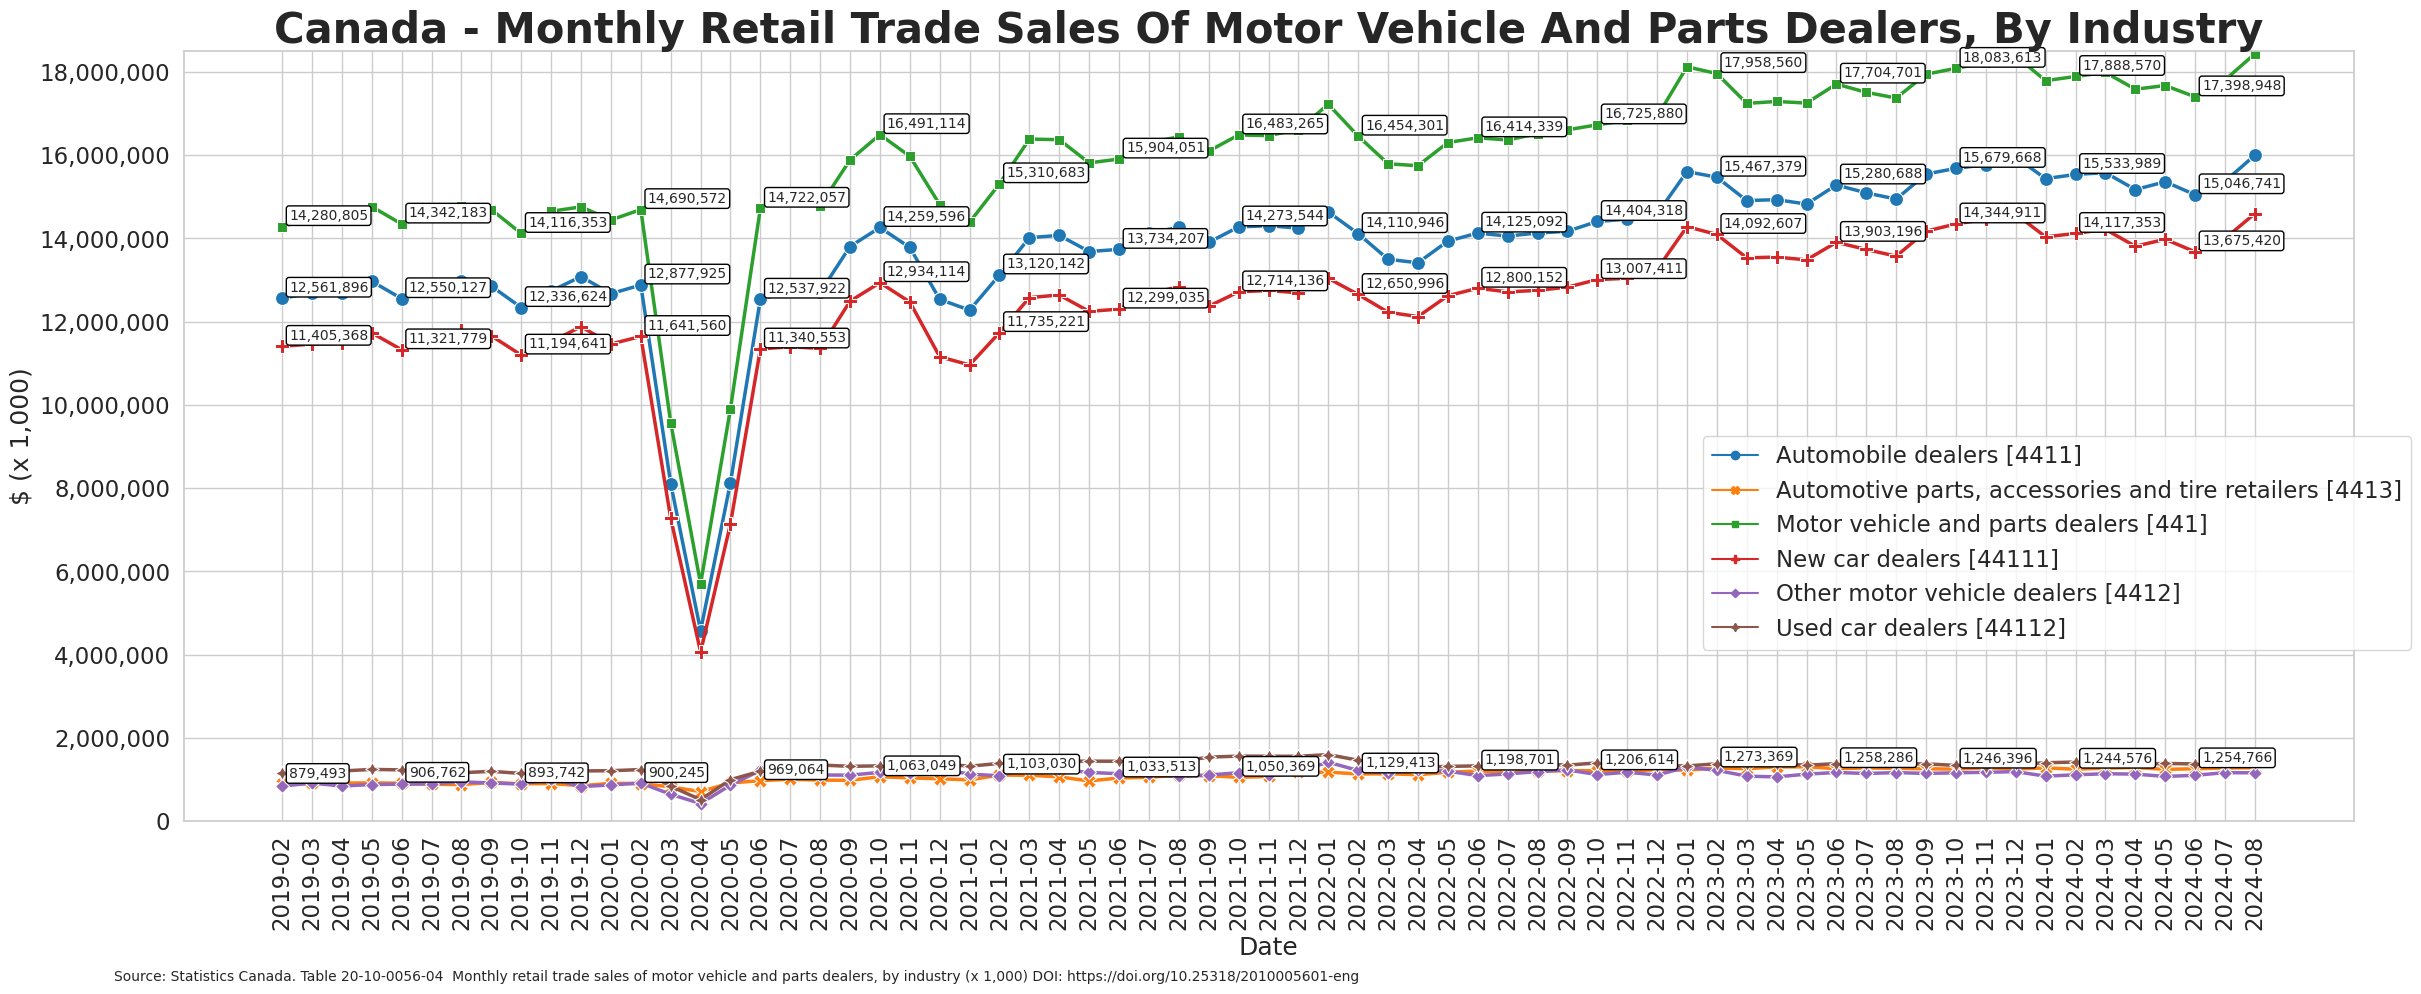

In [4]:
final_df = df[df['REF_DATE'] > '2019-01-01']
final_df = final_df.pivot(index='REF_DATE', columns='North American Industry Classification System (NAICS)', values='VALUE')

sns.set(style="whitegrid", font_scale=1.5)
fig, ax = plt.subplots(figsize=(28, 10), frameon=True)
sns.lineplot(data=final_df, palette="tab10", linewidth=2.5, markers=True, dashes=False, markersize=10, ax=ax)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

ax.set_xticks(final_df.index)
ax.set_xlabel('Date')
ax.set_ylabel('$ (x 1,000)')
ax.set_title("Canada - Monthly Retail Trade Sales Of Motor Vehicle And Parts Dealers, By Industry", fontdict={'size': 30, 'weight': 'bold'})

# Specify the exact location of the legend using the 'loc' parameter
ax.legend(loc='upper left', bbox_to_anchor=(0.7, 0.5), borderaxespad=0.)

plt.ylim(0, 18500000)
ax.yaxis.set_major_locator(mtick.MaxNLocator(integer=True))
plt.xticks(rotation=90)

skip_count = 3  # Specify how many labels to skip
skip_label = 0  # Initialize skip_label counter

for index, row in final_df.iterrows():
    y_list = []
    for col in row:
        if not math.isnan(col):
            display_flag = 1
            for value in y_list:
                if abs(value - col) <= 1000000:
                    display_flag = 0

            if display_flag == 1 and skip_label == 0:
                
                ax.annotate(f'{col:,.0f}', xy=(index, col), xytext=(5, 5), textcoords='offset points',
                            bbox=dict(boxstyle='round,pad=0.2', edgecolor='black', facecolor='white'),
                            fontsize=10) 
                
            y_list.append(col)

    skip_label = (skip_label + 1) % (skip_count + 1)

# Adding a footnote below the x-axis
footnote_text = "Source: Statistics Canada. Table 20-10-0056-04  Monthly retail trade sales of motor vehicle and parts dealers, by industry (x 1,000) DOI: https://doi.org/10.25318/2010005601-eng"
plt.figtext(0.1, -0.05, footnote_text, ha="left", fontsize=10, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))    
    
plt.savefig("graph1.png", transparent=True, bbox_inches='tight', pad_inches=0.05, dpi=500)